<a href="https://colab.research.google.com/github/zeynepsenatatli/PerceptronLearningAlgorithm/blob/main/PerceptronLearningAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 - Imports


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import sklearn.datasets
import h5py
import scipy
from scipy import ndimage
from scipy.special import expit
from PIL import Image

%matplotlib inline

## 2 - Dataset

In [ ]:
# Generate the data points. 
# return X: array containing one data point per column : shape (2,m) 
def generate_points(m=10, seed=42):
  X = []
  np.random.seed(seed)

  X = np.random.uniform(-1, 1, size=(2, m))
  
  # --> You might use the numpy function "randint".
  return X

In [ ]:
# Generate random decision boundary
# return w: weight vector representing decision boundary, of shape (3,1)
def random_boundary(seed=42):
  rng = np.random.RandomState(seed)

  # generate two random points A and B
  A, B = rng.uniform(-1, 1, size=(2, 2))

  # calculate vector w
  m = (B[1] - A[1]) / (B[0] - A[0])

  # calculating w vector with equation rules
  # w1 * x1 + w2 * x2 + w0 = 0
  # m = - (w1 / w2)

  w1 = m
  w2 = -1
  w0 = -(w1*A[0] + w2*A[1])

  w = [w0, w1, w2]
  w = np.reshape(w, (3,1))
  return w

In [ ]:
# Define function that calculates predictions
# input w : weight vector chracterising perceptron model : of shape (3,1)
# input X_ext : data matrix X, extended by a row of ones : of shape (3,m)
# return predictions : sign(w.transpose * x) : of shape (1,m)

def predict(w, X_ext):
  # --> you might want to use np.matmul()
  predictions = np.matmul(np.transpose(w), X_ext)

  predictions = np.where(predictions > 0, 1, -1)

  predictions = np.reshape(predictions, (1, X.shape[1]))
  return predictions



In [ ]:
m = 10

# Generate m random data points. X has shape (2,m)
X = generate_points(m)
# add a row of ones. X_ext has shape (3,m)
X_ext = np.vstack((np.ones((1,X.shape[1])), X))

# Generate random boundary. w has shape (3,1)
w = random_boundary()

# Generate labels. Y has shape (1,m)
Y = predict(w, X_ext)

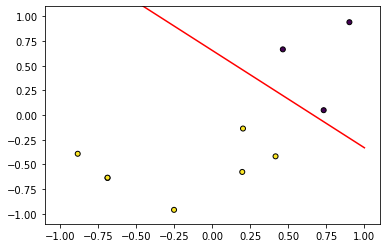

In [ ]:
# Visualize the data and the decision boundary
fig, ax = plt.subplots()
ax.scatter(X[0, :], X[1, :], marker='o', c=Y, s=25, edgecolor='k')

# the decision boundary chracterized by vector w
xp = np.array((-1,1))
yp = -(w[1]/w[2]) * xp - (w[0]/w[2])

plt.axis([-1.1, 1.1, -1.1, 1.1])
plt.plot(xp, yp, "r-") # decision boundary
plt.show()

In [ ]:
def visual(X, Y, w):
   # Visualize the data and the decision boundary
  fig, ax = plt.subplots()
  ax.scatter(X[0, :], X[1, :], marker='o', c=Y, s=25, edgecolor='k')

  # the decision boundary chracterized by vector w
  xp = np.array((-1,1))
  yp = -(w_[1]/w_[2]) * xp - (w_[0]/w_[2])

  plt.axis([-1.1, 1.1, -1.1, 1.1])
  plt.plot(xp, yp, "r-") # decision boundary
  plt.show()

In [ ]:
# Example of a point
index = 3
print("Point #" + str(index) + " is " + str(X[:,index]))
print("Class #" + str(index) + " is " + str(Y[0,index]))

Point #3 is [ 0.19731697 -0.57532178]
Class #3 is 1


## 3 - Training

In [ ]:
# Define function for weight update

# input w : current weight vector with shape (3,1)
# input x : misclassified data point (should have shape (3,1))
# input y : label of data point x (scalar)

# return new_w : updated weight vector
def weight_update(w, x, y, learning_rate):
  
  new_w = w + (learning_rate * (y - (-y)))*x

  new_w = np.reshape(new_w, (3,1))
  return new_w

### Perceptron

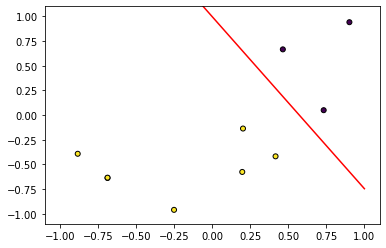

In [ ]:
# Initialize weight vector w_ with 0. 

w_ = np.zeros(3)
w_ = np.reshape(w_, (3,1))

learning_rate = 1
num_iterations = 10

# initialize array to save number of misclassified points in each iteration
num_misses = np.zeros(num_iterations)

for i in range(num_iterations):

  # calculate predictions for all points
  predictions = predict(w_, X_ext)

  # identify indices of misclassified points
  indices = np.where(Y[0]!=predictions[0], 1, 0)

  # calculate and save number of misclassified points 
  # break if there are none
  for k in indices:
    if k == 1:
      num_misses[i]+=1

  if num_misses[i] == 0: break
  
  # select random misclassified index
  selected_i = np.random.randint(0, len(indices))
  while indices[selected_i] == 0: selected_i = np.random.randint(0, len(indices))

  # perform one weight update using datapoint at selected index
  selected_data = [X_ext[0][selected_i], X_ext[1][selected_i], X_ext[2][selected_i]]
  selected_data = np.reshape(selected_data, (3,1))

  w_ = weight_update(w_, selected_data, Y[0][selected_i], learning_rate)
 
visual(X, Y, w_)
x = np.array(range(0, num_iterations))
y = np.array(num_misses)

## 4 - Experimente

### Experiment 1: m = 10, learning_rate = 1, num_iterations = 10

In [ ]:
w_ = np.zeros(3)
w_ = np.reshape(w_, (3,1))

learning_rate = 1
num_iterations = 10

num_misses = np.zeros(num_iterations)

stepstoSolution = np.zeros(1000)

for j in range(0,1000):

  w_ = np.zeros(3)
  w_ = np.reshape(w_, (3,1))
  num_misses = np.zeros(num_iterations)
  
  for i in range(num_iterations):

    predictions = predict(w_, X_ext)
    indices = np.where(Y[0]!=predictions[0], 1, 0)

    for k in indices:
      if k == 1:
        num_misses[i]+=1

    if num_misses[i] == 0: 
      stepstoSolution[j] = i
      break
    
    selected_i = np.random.randint(0, len(indices))
    
    while indices[selected_i] == 0: selected_i = np.random.randint(0, len(indices))

    selected_data = [X_ext[0][selected_i], X_ext[1][selected_i], X_ext[2][selected_i]]
    selected_data = np.reshape(selected_data, (3,1))

    w_ = weight_update(w_, selected_data, Y[0][selected_i], learning_rate)


mean: 4.101


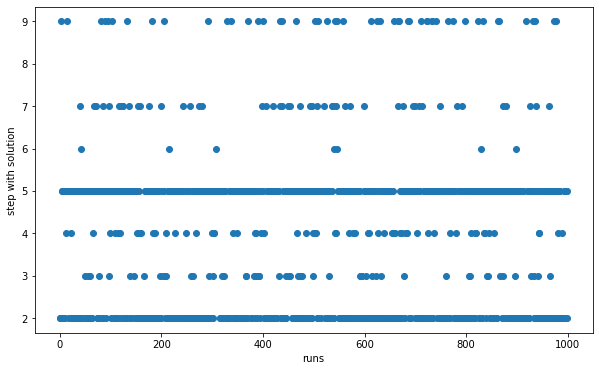

In [ ]:
mean = np.nanmean(stepstoSolution)

x = np.array(range(0, 1000))

stepstoSolution[stepstoSolution == 0] = np.NaN
y = np.array(stepstoSolution)

fig, axes = plt.subplots(figsize=(10,6))
axes.scatter(x, y)
axes.set_xlabel("runs")
axes.set_ylabel("step with solution")

print("mean: " + str(mean))

### Experiment 2: m = 100, learning_rate = 1, num_iterations = 100

In [ ]:
m = 100

X = generate_points(m)

X_ext = np.vstack((np.ones((1,X.shape[1])), X))

w = random_boundary()

Y = predict(w, X_ext)

In [ ]:
w_ = np.zeros(3)
w_ = np.reshape(w_, (3,1))

learning_rate = 1
num_iterations = 100

num_misses = np.zeros(num_iterations)

stepstoSolution = np.zeros(1000)

for j in range(0,1000):

  w_ = np.zeros(3)
  w_ = np.reshape(w_, (3,1))
  num_misses = np.zeros(num_iterations)
  
  for i in range(num_iterations):

    predictions = predict(w_, X_ext)
    indices = np.where(Y[0]!=predictions[0], 1, 0)

    for k in indices:
      if k == 1:
        num_misses[i]+=1

    if num_misses[i] == 0: 
      stepstoSolution[j] = i
      break
    
    selected_i = np.random.randint(0, len(indices))
    
    while indices[selected_i] == 0: selected_i = np.random.randint(0, len(indices))

    selected_data = [X_ext[0][selected_i], X_ext[1][selected_i], X_ext[2][selected_i]]
    selected_data = np.reshape(selected_data, (3,1))

    w_ = weight_update(w_, selected_data, Y[0][selected_i], learning_rate)

mean: 40.757


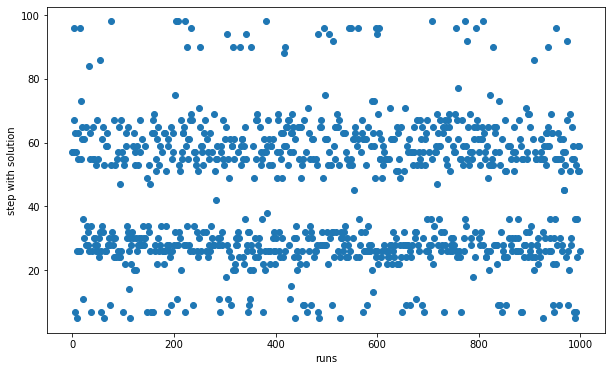

In [ ]:
mean = np.nanmean(stepstoSolution)

x = np.array(range(0, 1000))

stepstoSolution[stepstoSolution == 0] = np.NaN
y = np.array(stepstoSolution)

fig, axes = plt.subplots(figsize=(10,6))
axes.scatter(x, y)
axes.set_xlabel("runs")
axes.set_ylabel("step with solution")

print("mean: " + str(mean))

### Experiment 3: m = 100, learning_rate = 0.1, num_iterations = 100

In [ ]:
m = 100

X = generate_points(m)

X_ext = np.vstack((np.ones((1,X.shape[1])), X))

w = random_boundary()

Y = predict(w, X_ext)

In [ ]:
w_ = np.zeros(3)
w_ = np.reshape(w_, (3,1))

learning_rate = 0.1
num_iterations = 100

num_misses = np.zeros(num_iterations)

stepstoSolution = np.zeros(1000)

for j in range(0,1000):

  w_ = np.zeros(3)
  w_ = np.reshape(w_, (3,1))
  num_misses = np.zeros(num_iterations)
  
  for i in range(num_iterations):

    predictions = predict(w_, X_ext)
    indices = np.where(Y[0]!=predictions[0], 1, 0)

    for k in indices:
      if k == 1:
        num_misses[i]+=1

    if num_misses[i] == 0: 
      stepstoSolution[j] = i
      break
    
    selected_i = np.random.randint(0, len(indices))
    
    while indices[selected_i] == 0: selected_i = np.random.randint(0, len(indices))

    selected_data = [X_ext[0][selected_i], X_ext[1][selected_i], X_ext[2][selected_i]]
    selected_data = np.reshape(selected_data, (3,1))

    w_ = weight_update(w_, selected_data, Y[0][selected_i], learning_rate)

mean: 41.189


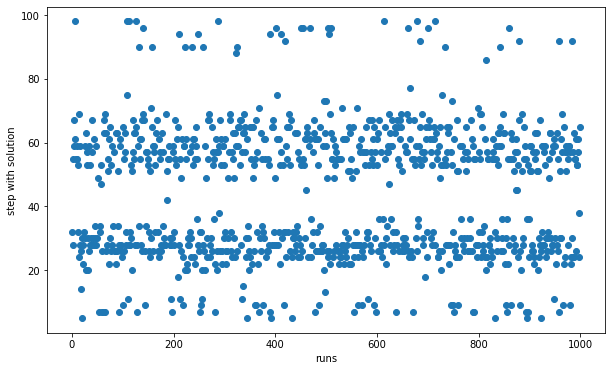

In [ ]:
mean = np.nanmean(stepstoSolution)

x = np.array(range(0, 1000))

stepstoSolution[stepstoSolution == 0] = np.NaN
y = np.array(stepstoSolution)

fig, axes = plt.subplots(figsize=(10,6))
axes.scatter(x, y)
axes.set_xlabel("runs")
axes.set_ylabel("step with solution")

print("mean: " + str(mean))

### Experiment 4: m = 1000, learning_rate = 1, num_iterations = 1000

In [ ]:
m = 1000

X = generate_points(m)

X_ext = np.vstack((np.ones((1,X.shape[1])), X))

w = random_boundary()

Y = predict(w, X_ext)

In [ ]:
w_ = np.zeros(3)
w_ = np.reshape(w_, (3,1))

learning_rate = 1
num_iterations = 1000

num_misses = np.zeros(num_iterations)

stepstoSolution = np.zeros(500)

for j in range(0,500):

  w_ = np.zeros(3)
  w_ = np.reshape(w_, (3,1))
  num_misses = np.zeros(num_iterations)
  
  for i in range(num_iterations):

    predictions = predict(w_, X_ext)
    indices = np.where(Y[0]!=predictions[0], 1, 0)

    for k in indices:
      if k == 1:
        num_misses[i]+=1

    if num_misses[i] == 0: 
      stepstoSolution[j] = i
      break
    
    selected_i = np.random.randint(0, len(indices))
    
    while indices[selected_i] == 0: selected_i = np.random.randint(0, len(indices))

    selected_data = [X_ext[0][selected_i], X_ext[1][selected_i], X_ext[2][selected_i]]
    selected_data = np.reshape(selected_data, (3,1))

    w_ = weight_update(w_, selected_data, Y[0][selected_i], learning_rate)

mean: 386.648


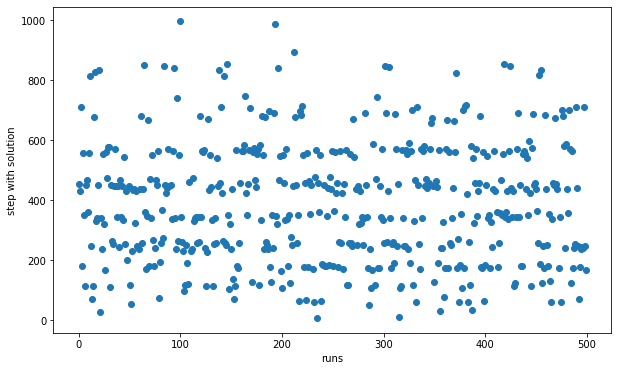

In [ ]:
mean = np.nanmean(stepstoSolution)

x = np.array(range(0, 500))

stepstoSolution[stepstoSolution == 0] = np.NaN
y = np.array(stepstoSolution)

fig, axes = plt.subplots(figsize=(10,6))
axes.scatter(x, y)
axes.set_xlabel("runs")
axes.set_ylabel("step with solution")

print("mean: " + str(mean))

### Experiment 4: m = 1000, learning_rate = 0.1, num_iterations = 1000

In [ ]:
m = 1000

X = generate_points(m)

X_ext = np.vstack((np.ones((1,X.shape[1])), X))

w = random_boundary()

Y = predict(w, X_ext)

In [ ]:
w_ = np.zeros(3)
w_ = np.reshape(w_, (3,1))

learning_rate = 1
num_iterations = 1000

num_misses = np.zeros(num_iterations)

stepstoSolution = np.zeros(500)

for j in range(0,500):

  w_ = np.zeros(3)
  w_ = np.reshape(w_, (3,1))
  num_misses = np.zeros(num_iterations)
  
  for i in range(num_iterations):

    predictions = predict(w_, X_ext)
    indices = np.where(Y[0]!=predictions[0], 1, 0)

    for k in indices:
      if k == 1:
        num_misses[i]+=1

    if num_misses[i] == 0: 
      stepstoSolution[j] = i
      break
    
    selected_i = np.random.randint(0, len(indices))
    
    while indices[selected_i] == 0: selected_i = np.random.randint(0, len(indices))

    selected_data = [X_ext[0][selected_i], X_ext[1][selected_i], X_ext[2][selected_i]]
    selected_data = np.reshape(selected_data, (3,1))

    w_ = weight_update(w_, selected_data, Y[0][selected_i], learning_rate)

mean: 386.648


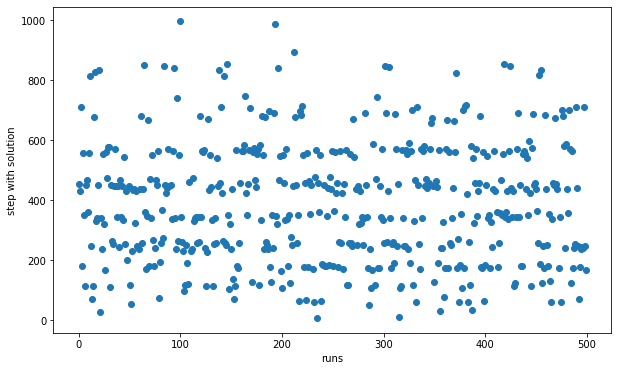

In [ ]:
mean = np.nanmean(stepstoSolution)

x = np.array(range(0, 500))

stepstoSolution[stepstoSolution == 0] = np.NaN
y = np.array(stepstoSolution)

fig, axes = plt.subplots(figsize=(10,6))
axes.scatter(x, y)
axes.set_xlabel("runs")
axes.set_ylabel("step with solution")

print("mean: " + str(mean))